In [2]:
# Gold & Silver Price Band Analysis

## Objective
## To quantitatively analyse the price behaviour of Gold and Silver and construct price band charts that help understand:
##- Long-term trend
##- Volatility regimes
##- Overheated vs corrected zones


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
gold = pd.read_csv("data/gold.csv")
silver = pd.read_csv("data/silver.csv")


In [7]:
gold.columns




Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')

In [8]:
silver.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='str')

In [9]:

gold.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='str')

In [10]:
gold['Date'] = pd.to_datetime(gold['Date'])
silver['Date'] = pd.to_datetime(silver['Date'], format='%d-%m-%Y')

In [11]:
gold.set_index('Date', inplace=True)
silver.set_index('Date', inplace=True)

gold = gold.sort_index()
silver = silver.sort_index()



In [12]:
gold.rename(columns={'Price': 'Close'}, inplace=True)
silver.rename(columns={'Price': 'Close'}, inplace=True)



In [13]:
silver['Close'] = pd.to_numeric(
    silver['Close'].astype(str).str.replace(',', ''),
    errors='coerce'
)

gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')


In [14]:
gold.index.min(), gold.index.max()
silver.index.min(), silver.index.max()

gold['Close'].dtype
silver['Close'].dtype


dtype('int64')

In [15]:
## Task 1: Return & Volatility Analysis


In [16]:
start_date = max(gold.index.min(), silver.index.min())
end_date = min(gold.index.max(), silver.index.max())

start_date, end_date

(Timestamp('2014-01-01 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [17]:
gold_aligned = gold.loc[start_date:end_date]
silver_aligned = silver.loc[start_date:end_date]


In [18]:
gold_aligned['returns'] = gold_aligned['Close'].pct_change()
silver_aligned['returns'] = silver_aligned['Close'].pct_change()


In [19]:
print(gold_aligned.head())



            Close   Open   High    Low  Volume  Chg%   returns
Date                                                          
2014-01-01  29542  29435  29598  29340    2930  0.25       NaN
2014-01-02  29975  29678  30050  29678    3140  1.47  0.014657
2014-01-03  29727  30031  30125  29539    3050 -0.83 -0.008274
2014-01-04  29279  29279  29279  29279       0 -1.51 -0.015070
2014-01-06  29119  29300  29395  29051   24380 -0.55 -0.005465


In [20]:
print(silver_aligned.head())



            Close    Open    High     Low    Vol. Change %   returns
Date                                                                
2014-01-01  43876  43,870  44,034  43,735   2.30K    0.10%       NaN
2014-01-02  45348  44,000  45,500  44,000  30.70K    3.35%  0.033549
2014-01-03  45475  45,300  45,729  45,064  24.57K    0.28%  0.002801
2014-01-04  45475  45,475  45,475  45,475     NaN    0.00%  0.000000
2014-01-06  45370  45,421  45,740  45,033  27.42K   -0.23% -0.002309


In [21]:
window = 252

gold_aligned['volatility'] = (
    gold_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)

silver_aligned['volatility'] = (
    silver_aligned['returns']
    .rolling(window)
    .std() * np.sqrt(252)
)


In [22]:
print(gold_aligned.tail())


            Close   Open   High    Low  Volume  Chg%   returns  volatility
Date                                                                      
2024-08-26  71500  71417  71775  71252   14690  0.29  0.002875    0.122316
2024-08-27  71551  71695  71696  71245   11520  0.07  0.000713    0.122252
2024-08-28  71328  71490  71543  71062   11790 -0.31 -0.003117    0.122294
2024-08-29  71666  71403  71718  71281   14010  0.47  0.004739    0.122294
2024-08-30  71195  71463  71697  71129    7600 -0.66 -0.006572    0.122492


In [23]:
print(silver_aligned.tail())

            Close    Open    High     Low    Vol. Change %   returns  \
Date                                                                   
2024-08-26  85668  84,924  86,170  84,852  13.91K    0.54%  0.005363   
2024-08-27  85658  85,350  85,969  85,044  13.20K   -0.01% -0.000117   
2024-08-28  83977  85,373  85,418  83,650  14.85K   -1.96% -0.019625   
2024-08-29  84872  84,399  85,000  84,031  11.96K    1.07%  0.010658   
2024-08-30  84300  84,528  84,619  84,250   0.49K   -0.67% -0.006740   

            volatility  
Date                    
2024-08-26    0.227096  
2024-08-27    0.226980  
2024-08-28    0.227696  
2024-08-29    0.227914  
2024-08-30    0.227798  


In [24]:
silver_aligned['Close'].dtype


dtype('int64')

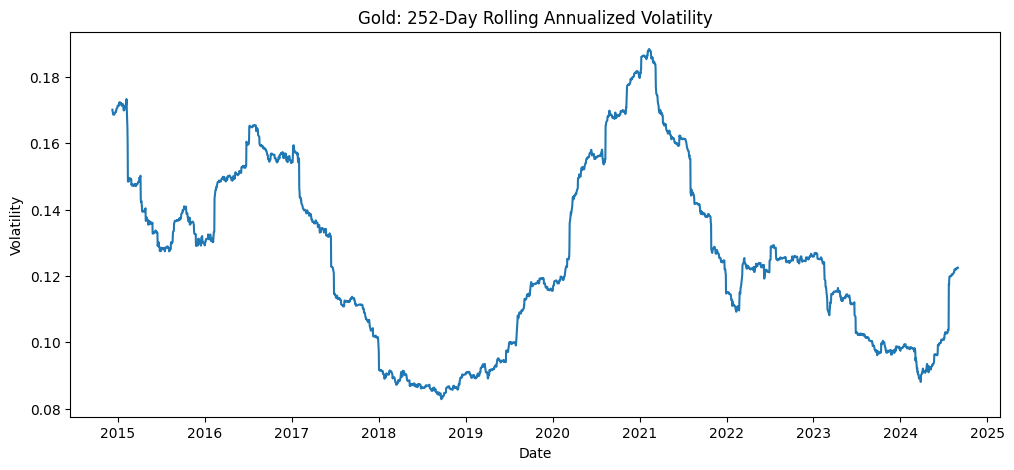

In [25]:
plt.figure(figsize=(12,5))
plt.plot(gold_aligned.index, gold_aligned['volatility'])
plt.title("Gold: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()



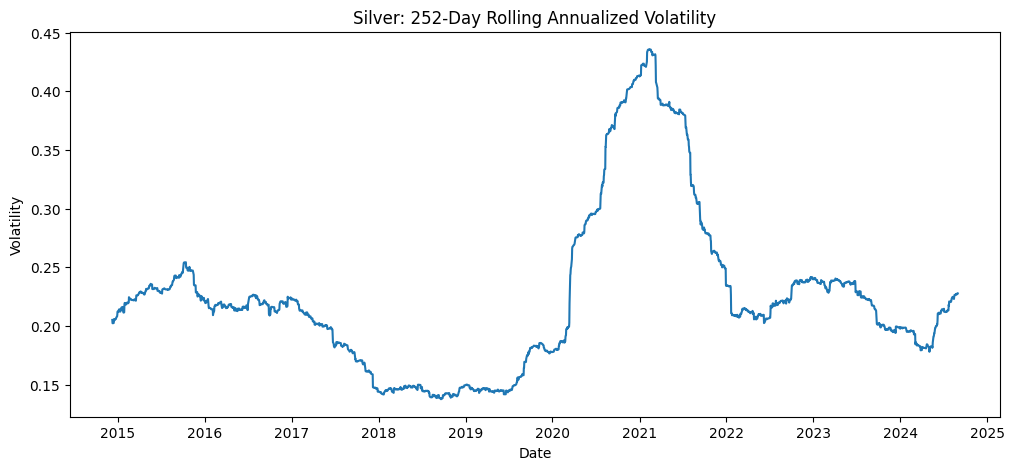

In [26]:
plt.figure(figsize=(12,5))
plt.plot(silver_aligned.index, silver_aligned['volatility'])
plt.title("Silver: 252-Day Rolling Annualized Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


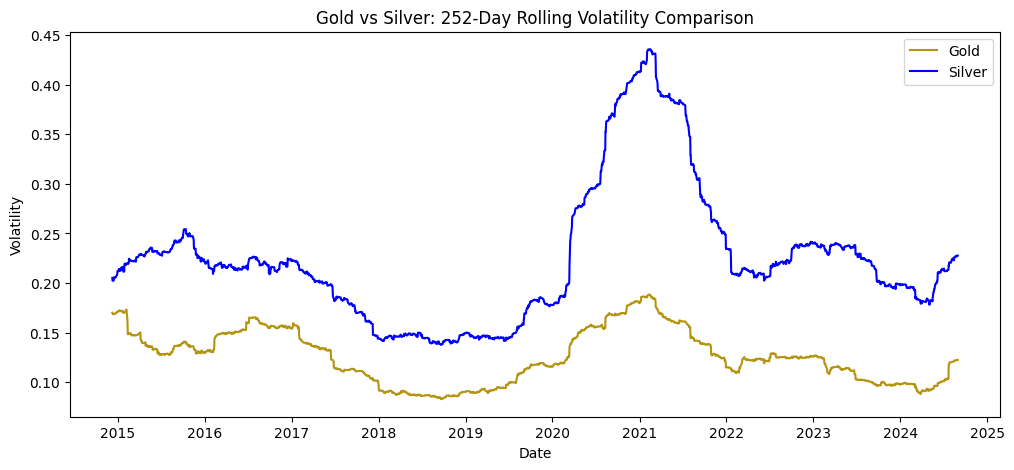

In [55]:
plt.figure(figsize=(12,5))
plt.plot( gold_aligned.index, gold_aligned['volatility'], label='Gold',color='#B59410')
plt.plot( silver_aligned.index, silver_aligned['volatility'], label='Silver',color='blue')
plt.title("Gold vs Silver: 252-Day Rolling Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


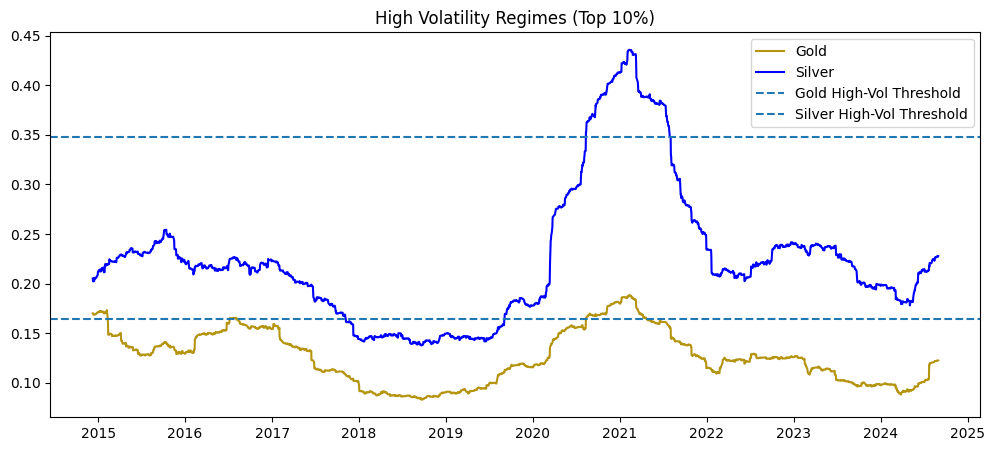

In [54]:
gold_threshold = gold_aligned['volatility'].quantile(0.90)
silver_threshold = silver_aligned['volatility'].quantile(0.90)

plt.figure(figsize=(12,5))
plt.plot( gold_aligned.index, gold_aligned['volatility'], label='Gold',color='#B59410')
plt.plot( silver_aligned.index, silver_aligned['volatility'], label='Silver',color='blue')

plt.axhline(gold_threshold, linestyle='--', label='Gold High-Vol Threshold')

plt.axhline(silver_threshold, linestyle='--', label='Silver High-Vol Threshold')

plt.title("High Volatility Regimes (Top 10%)")
plt.legend()
plt.show()


In [ ]:
##period of high volatility : 2020-2022 Pandemic,demonitisation 2016

In [29]:
## Task 2: Price Band Construction


In [30]:
## Using 200 day average and bands using z-score (the preffered way), why not regression based???

In [31]:
gold.head()



,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


In [32]:
silver.head()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-01,43876,"43,870","44,034","43,735",2.30K,0.10%
2014-01-02,45348,"44,000","45,500","44,000",30.70K,3.35%
2014-01-03,45475,"45,300","45,729","45,064",24.57K,0.28%
2014-01-04,45475,"45,475","45,475","45,475",NaN,0.00%
2014-01-06,45370,"45,421","45,740","45,033",27.42K,-0.23%


In [33]:
""" Methodology
A 200-day moving average is used to represent the long-term price trend.  
Rolling standard deviation over the same window captures time-varying volatility.  
Upper and lower price bands are constructed at -+2 standard deviations from the trend,  
representing statistically extreme price zones."""


' Methodology\nA 200-day moving average is used to represent the long-term price trend.  \nRolling standard deviation over the same window captures time-varying volatility.  \nUpper and lower price bands are constructed at -+2 standard deviations from the trend,  \nrepresenting statistically extreme price zones.'

In [35]:
gold = gold.rename(columns={'Close': 'Price'})
silver = silver.rename(columns={'Close': 'Price'})


In [36]:
window = 200
z = 2  

gold['MA_200'] = gold['Price'].rolling(window).mean()
gold['STD_200'] = gold['Price'].rolling(window).std()

gold['Upper_Band'] = gold['MA_200'] + 2 * gold['STD_200']
gold['Lower_Band'] = gold['MA_200'] - 2 * gold['STD_200']

gold['z_score'] = (gold['Price'] - gold['MA_200']) / gold['STD_200']



In [37]:
window = 200
z = 2  

silver['MA_200'] = silver['Price'].rolling(window).mean()
silver['STD_200'] = silver['Price'].rolling(window).std()

silver['Upper_Band'] = silver['MA_200'] + 2 * silver['STD_200']
silver['Lower_Band'] = silver['MA_200'] - 2 * silver['STD_200']

silver['z_score'] = (silver['Price'] - silver['MA_200']) / silver['STD_200']




In [38]:
##TASK 3

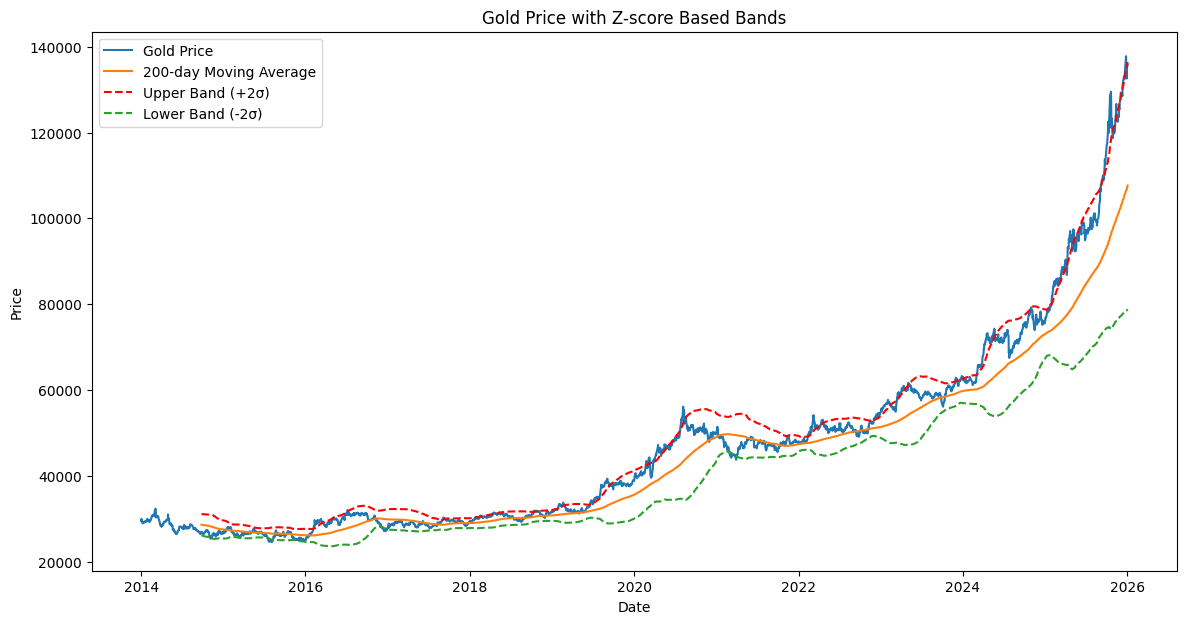

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(gold.index, gold['Price'], label='Gold Price')


plt.plot(gold.index, gold['MA_200'], label='200-day Moving Average')


plt.plot(gold.index, gold['Upper_Band'], linestyle='--', label='Upper Band (+2σ)', color='red')
plt.plot(gold.index, gold['Lower_Band'], linestyle='--', label='Lower Band (-2σ)')


plt.title('Gold Price with Z-score Based Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()



In [40]:
##2016 to 2018 gold market isnt volatile

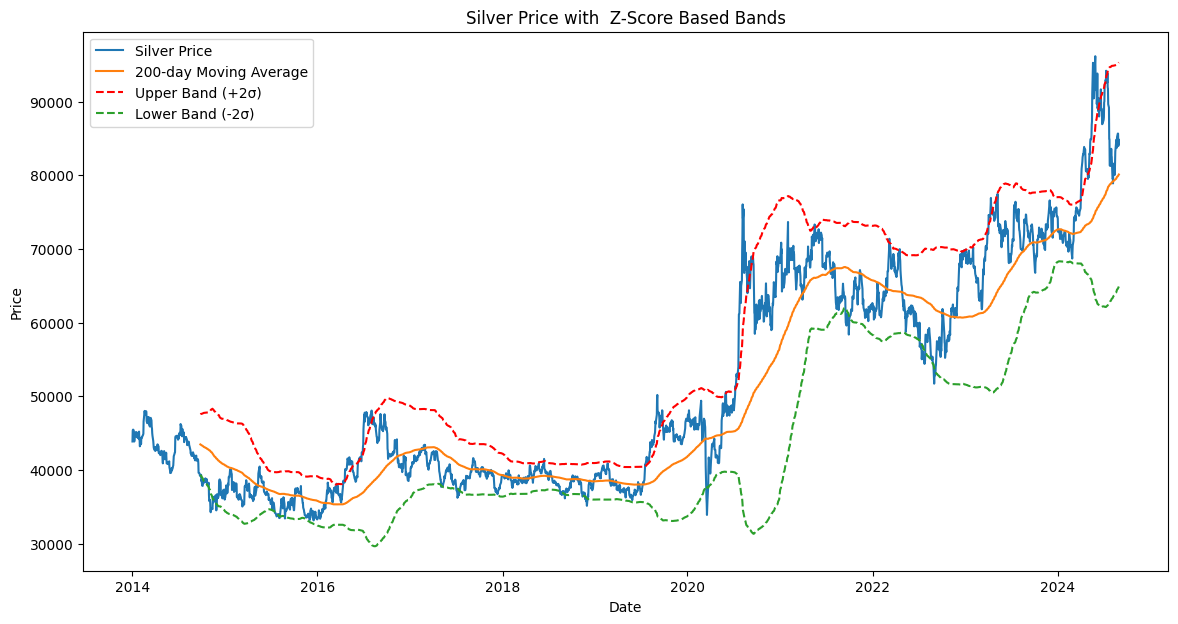

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(silver.index, silver['Price'], label='Silver Price')


plt.plot(silver.index, silver['MA_200'], label='200-day Moving Average')


plt.plot(silver.index, silver['Upper_Band'], linestyle='--', label='Upper Band (+2σ)',color='red')
plt.plot(silver.index, silver['Lower_Band'], linestyle='--', label='Lower Band (-2σ)')


plt.title('Silver Price with  Z-Score Based Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


In [42]:
 ##Task 4: Interpretation & Investment Insight

##Using the latest available prices, Gold is observed to be trading close to its upper volatility band, indicating elevated prices relative to its long-term trend. The widening of the bands suggests a high-volatility regime rather than a stable market environment. Silver shows a similar positioning but with noticeably wider bands, reflecting higher historical volatility and greater sensitivity to market conditions. This behaviour aligns with the article’s view of elevated volatility in noble metals. Comparatively, Silver exhibits greater deviation from trend and a higher risk profile than Gold. During such periods, a cautious and staggered approach to exposure may help manage volatility-related risk, presented as an observational insight rather than investment advice.


In [43]:
gold_latest = gold.iloc[-1]
silver_latest = silver.iloc[-1]


In [44]:
gold_latest


Price         135793.000000
Open          136143.000000
High          137037.000000
Low           135525.000000
Volume         51877.000000
Chg%               0.020000
MA_200        107632.750000
STD_200        14397.347001
Upper_Band    136427.444003
Lower_Band     78838.055997
z_score            1.955933
Name: 2026-01-02 00:00:00, dtype: float64

In [46]:
silver_latest



Price                84300
Open                84,528
High                84,619
Low                 84,250
Vol.                 0.49K
Change %            -0.67%
MA_200           80105.965
STD_200        7599.856452
Upper_Band    95305.677903
Lower_Band    64906.252097
z_score           0.551857
Name: 2024-08-30 00:00:00, dtype: object

In [ ]:
"""
**staggering allocation**

staggering is typically used when an investor already possesses a significant amount of capital but is cautious about immediate market condition

investor is able to make a mindful investment over time 

- **Staggered investing (Systematic Investment Plan style)**:
    - You buy at different prices.
    - Your average cost per share is lower.
    - You reduce the risk of bad timing.
    - You benefit when prices recover
- 

By buying gradually, you lowered your average purchase price (closer to ₹3043 per share instead of ₹3545). When the price recovered in August, your gains were much higher than if you had invested everything at once.

it cushions you against market dips and lets you benefit when prices bounce back